## Students Adaptability Level in Online Education

### Description of the data set
#### This data set contains informations about all the factors that are involved in the online mode of education. 

### Purpose of the analysis
#### The inspiration behind this model is to harness the dataset to get an idea about the effectiveness of online education. We are also looking for any significant relationship or trends between attributes.


### The target feature is
- Adaptivity level : moderate , low , high

### The feature sets are:
- Gender
- Age
- Education Level
- Institution Type
- IT Student
- Location in Town
- Load-shedding
- Financial Condition
- Internet Type
- Network Type
- Class Duration
- Self LMS
- Device



### Approach

- We have 13 features (categorical) to predict wheather the adaptivity level is moderate , high or low( nominal categorical)
- Hence we are dealing with a multiclass problem .
- for the clssification model , we are using 2 models
- As a baseline model , multinomial logistic regression is implememted .
- k-Nearest Neighbors is implemented and the performance of the two models are analysed.

#### Importing Libraries

In [203]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,ConfusionMatrixDisplay
from sklearn.feature_selection import RFE
import math
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


#### Loading the dataset

In [181]:
data = pd.read_csv('/Users/shruthi/Downloads/practical-workshops-Shruthi1317/Portfolio/data-science-portfolio-Shruthi1317/Portfolio_4_dataset_students_adaptibility.csv')


### Exploratory Data Analysis

In [146]:
data.head(10)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
5,Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
6,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,0,No,Mobile,Low
7,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
8,Boy,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
9,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate


In [147]:
col=data.columns
data.shape

(1205, 14)

In [148]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [149]:
data.describe()


,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


#### Checking for null values

In [150]:
for i in col:
    print(i,"-",data[i].isna().sum())


Gender - 0
Age - 0
Education Level - 0
Institution Type - 0
IT Student - 0
Location - 0
Load-shedding - 0
Financial Condition - 0
Internet Type - 0
Network Type - 0
Class Duration - 0
Self Lms - 0
Device - 0
Adaptivity Level - 0


- There are 1205 rows and 14 categorical attributes with no null values

#### Visualising the attibutes 

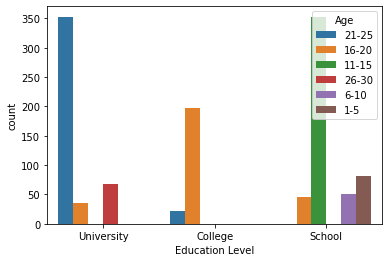

In [151]:
 ax = sns.countplot(x="Education Level",hue= 'Age', data= data)


students from age :
- 11-15yrs correspond to school students
- 16-20yrs correspond to college students
- 21-25yrs correspond to university students
- The above 3 age groups of students form majority of the userbase for online mode of teaching.


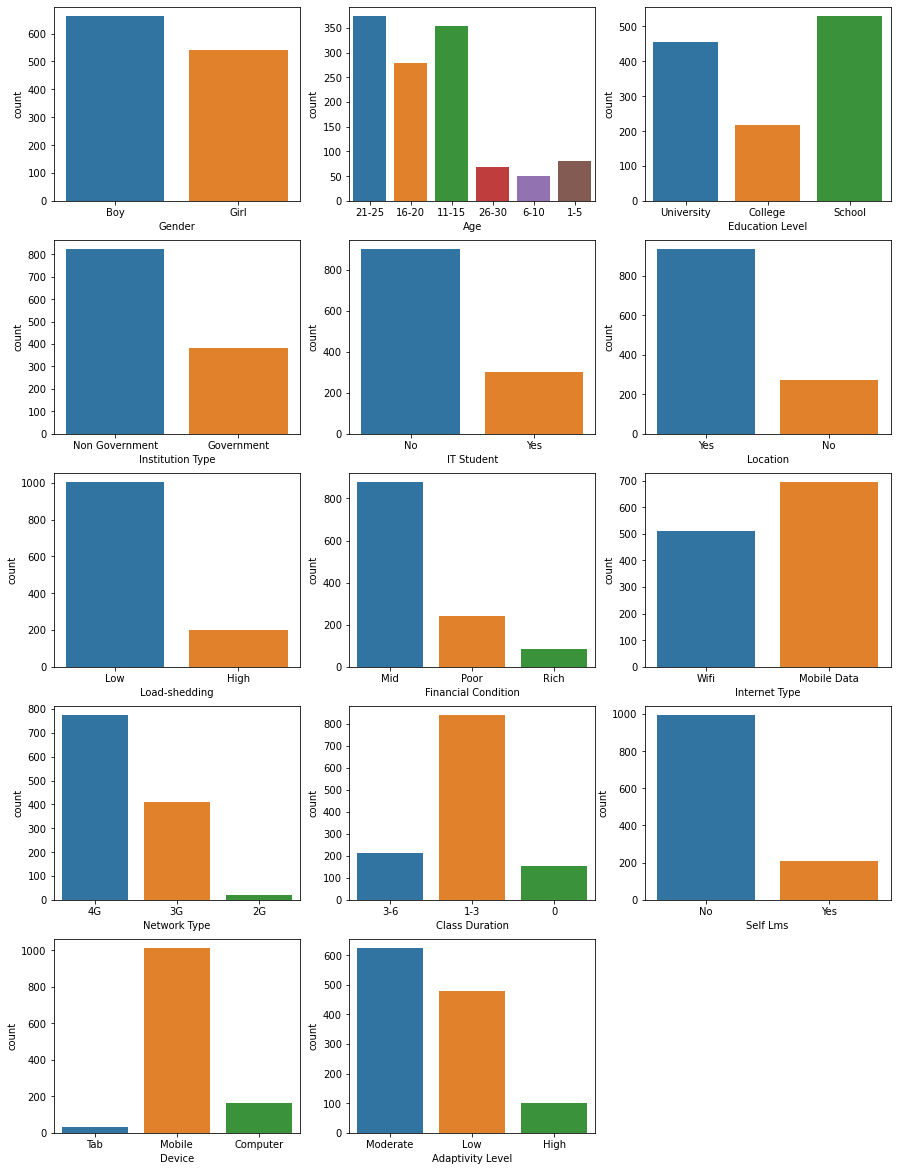

In [175]:
i = 1
plt.figure(figsize = (15,25))
for feature in col:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = data)
    i +=1


### Analysis and Discussion

- Both boys and girls take part equally in online mode of education.
- students from 11 yrs to 25 yrs contribute to majority of the userbase for online mode of education.
- majority of the students come from non-government institution and are non-IT students.
- most of the students who participated in online education come from middle class background.
- the percentage of 2g for internet is fairly small among both wifi and mobile data usage for online class indicating good network connection among students who are availing online education.
- most of the students spend 1- 3 hrs per day on online class.
- a very small proportion of students opt for self learning management system.
- most of the students prefer using mobile phone to attend online classes.

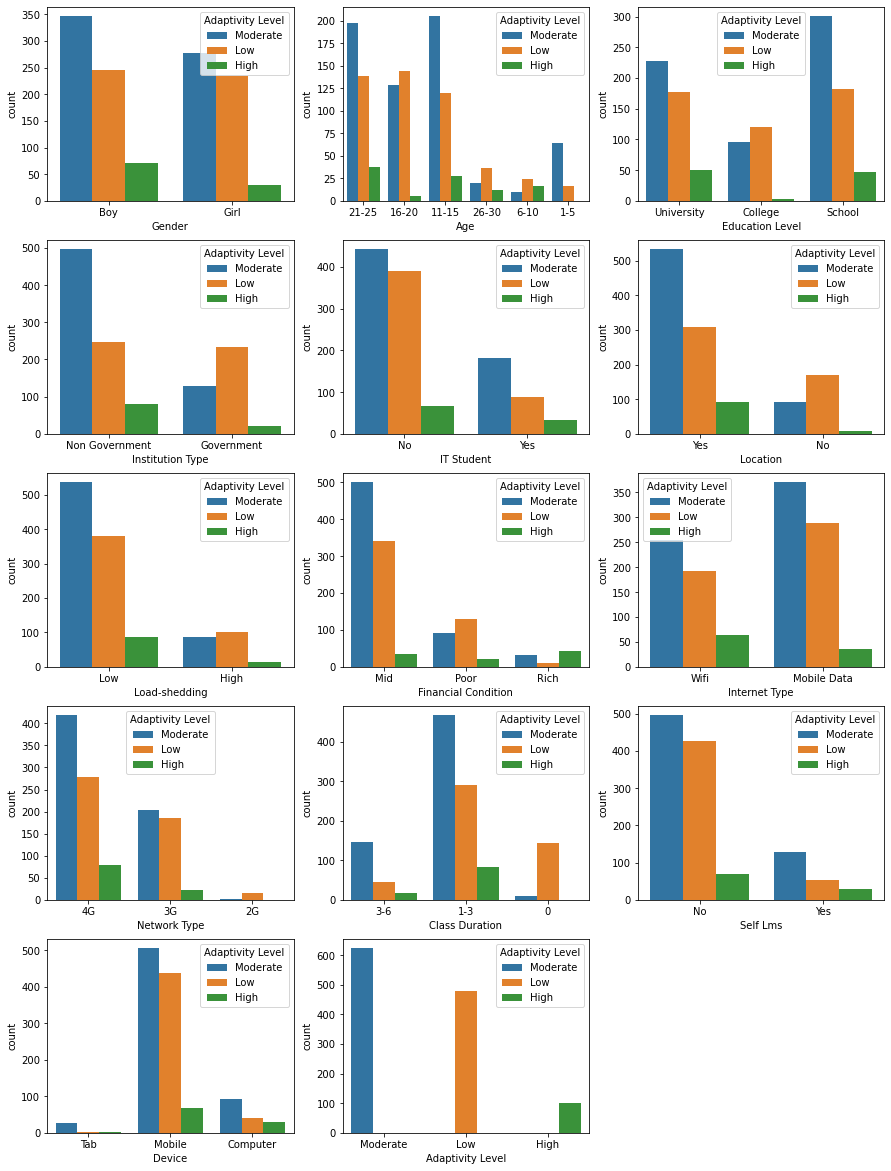

In [176]:
i = 1
plt.figure(figsize = (15,25))
for feature in col:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue='Adaptivity Level', data = data)
    i +=1

#### Inference based on Adaptivity Level

- Boys have slightly better adaptivity for online mode compared to girls.
- students from age 11 - 25 yrs show more adaptivity than other age groups.
- school level students show better adaptivity compared to college / University students.
- Non-Government Institutions  and non-IT students show more results on adaptivity.
- users with poor network connection such as 2g have a negative impact on adaptivity.
- students who spend around 1-3 hrs for online class have highest adaptivity.
- students who attend online class via mobile have comparatively high adaptivity.


### Encoding Categorical variables 

In [182]:
from sklearn.preprocessing import OrdinalEncoder

scaler = OrdinalEncoder()
d = scaler.fit_transform(data)

scaled_df = pd.DataFrame(d, columns=col)
scaled_df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,2.0,2.0
1,1.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0
2,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0
4,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


#### Correlation


In [44]:
scaled_df.corr()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
Gender,1.000000,-0.130395,-0.197743,0.106910,-0.233284,-0.034231,0.059998,-0.017410,-0.021589,-0.032527,-0.035407,-0.138331,0.140691,0.033426
Age,-0.130395,1.000000,0.414985,-0.216818,0.320066,-0.187269,-0.122011,0.028792,0.203195,-0.049077,0.065048,0.246289,-0.171172,-0.230317
Education Level,-0.197743,0.414985,1.000000,0.116403,0.415967,0.063676,0.004725,0.083509,0.080694,-0.046162,0.165127,0.326259,-0.278548,-0.032694
Institution Type,0.106910,-0.216818,0.116403,1.000000,0.104185,0.326813,-0.017794,0.013586,0.060198,-0.060035,0.348251,0.096722,-0.096857,0.162387
IT Student,-0.233284,0.320066,0.415967,0.104185,1.000000,0.009697,-0.186005,-0.025075,0.113452,-0.128817,0.228662,0.453429,-0.386776,0.049282
Location,-0.034231,-0.187269,0.063676,0.326813,0.009697,1.000000,0.245380,0.056958,0.222660,0.171539,0.216953,-0.036443,-0.070397,0.107414
Load-shedding,0.059998,-0.122011,0.004725,-0.017794,-0.186005,0.245380,1.000000,-0.001017,-0.013199,0.164678,-0.119729,-0.187610,0.052088,0.043611
Financial Condition,-0.017410,0.028792,0.083509,0.013586,-0.025075,0.056958,-0.001017,1.000000,-0.020469,-0.019926,0.023791,-0.064362,-0.020968,-0.274643
Internet Type,-0.021589,0.203195,0.080694,0.060198,0.113452,0.222660,-0.013199,-0.020469,1.000000,0.335989,0.250804,0.084661,-0.250007,-0.084276
Network Type,-0.032527,-0.049077,-0.046162,-0.060035,-0.128817,0.171539,0.164678,-0.019926,0.335989,1.000000,-0.019866,-0.207056,-0.063738,0.021647


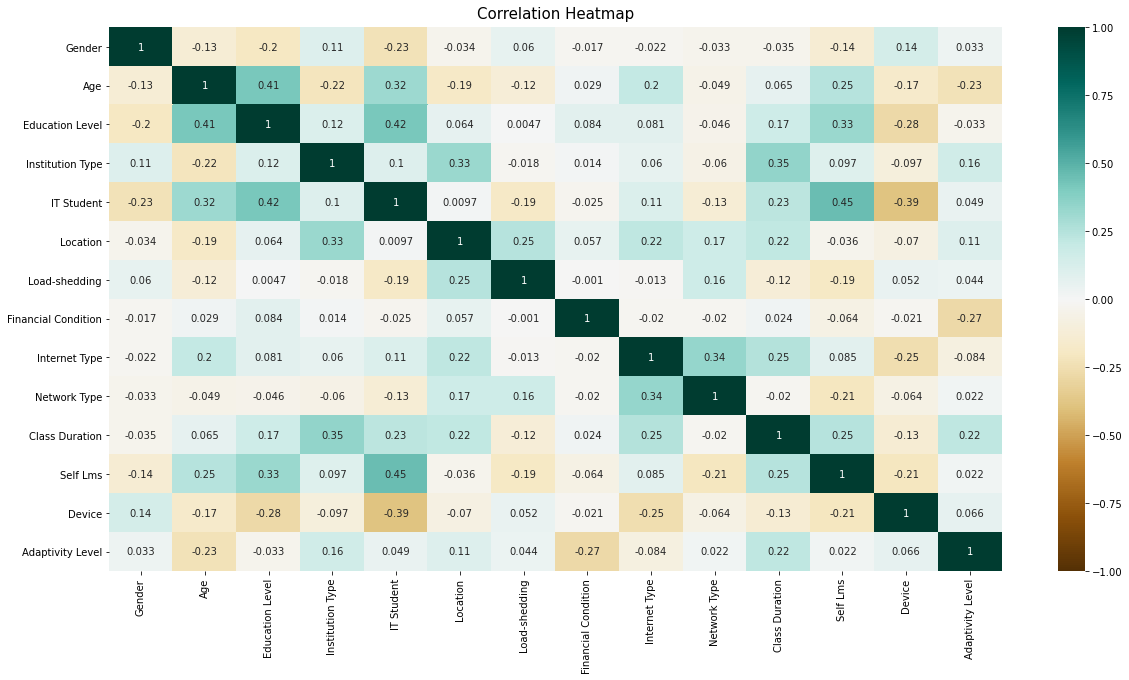

In [52]:
#Correlation Heatmap
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(scaled_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=9);

#### Comments on Correlation 

All the attributes show very weak correlation with the target feature "Adaptivity Level". However among all the weak relationships the following attributes have the highest correlation.
- Financial Condition has the highest negative correlation with adaptivity.
- Class Duration has the highest positive correlation with adaptivity.

#### Model building

In [183]:
# target variable is Adaptivity Level
X=scaled_df.drop(['Adaptivity Level'],axis=1)
y=scaled_df[['Adaptivity Level']]

#### Test Train Split

In [184]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)


### Multiclass Logistic Regression

Logistic regression, by default, is limited to two-class classification problems. Multinomial logistic regression is an extension of logistic regression for multi-class classification.

In [185]:
clf=LogisticRegression(random_state=42,multi_class='multinomial',solver='lbfgs', max_iter=500,penalty='l2',warm_start=True)
clf.fit(X_train,y_train.values.ravel())


LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42,
                   warm_start=True)

In [186]:
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': True}

In [187]:
pred=clf.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.76      0.33      0.46        39
         1.0       0.74      0.60      0.66       154
         2.0       0.63      0.82      0.71       169

    accuracy                           0.67       362
   macro avg       0.71      0.58      0.61       362
weighted avg       0.69      0.67      0.66       362



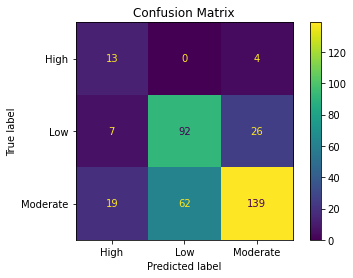

In [188]:
cm = confusion_matrix(pred,y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low","Moderate"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [195]:
Logistic_reg_acc = accuracy_score(y_test, pred)
print("Accuracy score for logistic regression model : ", Logistic_reg_acc)



Accuracy score for logistic regression model :  0.6740331491712708


In [190]:
pred

array([2., 2., 2., 1., 2., 0., 2., 2., 2., 1., 0., 1., 2., 2., 1., 2., 2.,
       2., 2., 1., 2., 2., 2., 1., 1., 2., 2., 0., 2., 2., 1., 2., 1., 2.,
       2., 1., 2., 2., 2., 1., 1., 0., 2., 2., 2., 2., 2., 1., 1., 2., 2.,
       2., 1., 2., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2.,
       2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2.,
       1., 2., 2., 1., 2., 2., 1., 2., 2., 0., 2., 2., 2., 1., 1., 2., 2.,
       2., 1., 1., 2., 1., 0., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1.,
       1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2.,
       1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 0., 2., 1.,
       2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1.,
       0., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1.,
       2., 2., 1., 2., 2., 2., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2., 1.,
       2., 2., 1., 2., 1., 2., 2., 1., 2., 1., 2., 1., 1., 1., 2., 1., 2.,
       2., 2., 2., 2., 0.

#### Recursive Feature Elimination

In [204]:
# creating RFE object

lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=4, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=4)

In [205]:
# doing evaluation
y_test_hat = rfe.predict(X_test)
print("accuracy score on test set: ", accuracy_score(y_test, y_test_hat))

accuracy score on test set:  0.6629834254143646


In [206]:
# summarize all features
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 4.000
Column: 1, Selected False, Rank: 8.000
Column: 2, Selected False, Rank: 10.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 7.000
Column: 5, Selected False, Rank: 6.000
Column: 6, Selected False, Rank: 3.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 5.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected False, Rank: 2.000
Column: 12, Selected False, Rank: 9.000


 top ranked 4 features - Institution Type , Financial Condition , Network Type , Class Duration

In [209]:
# to increment number of features, one at each time
acc_scores = []
for i in range(1,13):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("Acc on test set using", i, "features: ", acc_score)
    # append to the list
    acc_scores.append(acc_score)

Acc on test set using 1 features:  0.5966850828729282
Acc on test set using 2 features:  0.6132596685082873
Acc on test set using 3 features:  0.6629834254143646
Acc on test set using 4 features:  0.6629834254143646
Acc on test set using 5 features:  0.6519337016574586
Acc on test set using 6 features:  0.643646408839779
Acc on test set using 7 features:  0.6850828729281768
Acc on test set using 8 features:  0.6740331491712708
Acc on test set using 9 features:  0.6823204419889503
Acc on test set using 10 features:  0.6767955801104972
Acc on test set using 11 features:  0.6767955801104972
Acc on test set using 12 features:  0.6740331491712708


there is not much improvement in accuracy with the top ranked features.

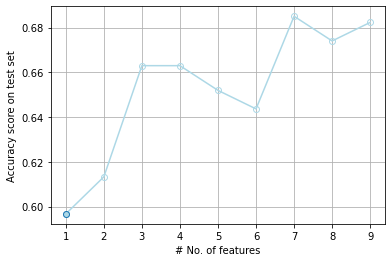

In [211]:
# Estimating accuracy score on test set using RFE by using different number of features
estimator = LogisticRegression()
acc_scores = []
for i in range(1, 10):
    selector = RFE(estimator, i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)
  
best = 1
for item in acc_scores:
    if item < acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()   
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 10), acc_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'lightblue', markerfacecolor = 'None')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'lightblue')

#### Interpretation of Logistic Regression model

The Multiclass Logistic Regression model gave an accuracy of 67%.

After performing recursive feature elimination , it can be seen that there is no big spike in accuracy for any no.of feature subset.
accuracy with 7 features is 68% and with all features is 67% hence , RFE was not useful to improve accuracy.

### Advanced model : KNN 

In [213]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train.values.ravel())


KNeighborsClassifier(n_neighbors=1)

In [214]:
pred = knn.predict(X_test)
print(classification_report(y_test,pred, zero_division=1))


              precision    recall  f1-score   support

         0.0       0.70      0.79      0.75        39
         1.0       0.88      0.84      0.86       154
         2.0       0.84      0.85      0.85       169

    accuracy                           0.84       362
   macro avg       0.81      0.83      0.82       362
weighted avg       0.84      0.84      0.84       362



In [215]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y.values.ravel(),cv=10)
    accuracy_rate.append(score.mean())

In [216]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y.values.ravel(),cv=10)
    error_rate.append(1-score.mean())

In [221]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn.fit(X_train,y_train.values.ravel())
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test.values.ravel()))

Text(0, 0.5, 'Error Rate')

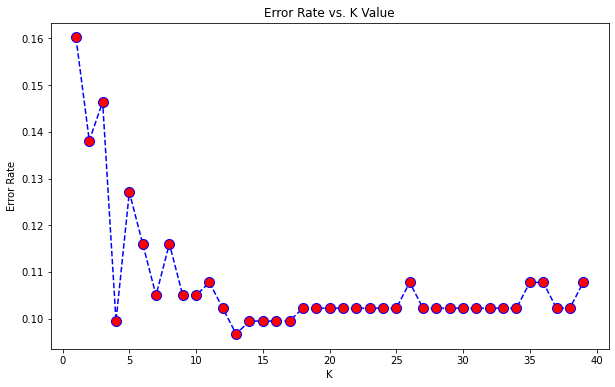

In [222]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [229]:
# NOW WITH K=7
knn = KNeighborsClassifier(n_neighbors=7,weights='distance')

knn.fit(X_train,y_train.values.ravel())
pred = knn.predict(X_test)

print('WITH K=7')
print('\n')
print(confusion_matrix(y_test.values.ravel(),pred))
print('\n')
print(classification_report(y_test.values.ravel(),pred))

WITH K=7


[[ 28   0  11]
 [  3 141  10]
 [  1  13 155]]


              precision    recall  f1-score   support

         0.0       0.88      0.72      0.79        39
         1.0       0.92      0.92      0.92       154
         2.0       0.88      0.92      0.90       169

    accuracy                           0.90       362
   macro avg       0.89      0.85      0.87       362
weighted avg       0.89      0.90      0.89       362



In [232]:
Knn_acc = accuracy_score(y_test, pred)
print("Accuracy score for Knn model : ", Knn_acc)



Accuracy score for Knn model :  0.8950276243093923


### Interpretation of KNN model
- We see that optimal value of k = 7 because it has least error rate .
- hence we compute the 7 nearest neighbours to each test point.
- accuracy when k = 7 is 90% and when k = 1 , accuracy was 84%


### Comparing Accuracy of models

In [251]:
# accuracy 
Accuracy = {'acc' : [Logistic_reg_acc , Knn_acc] , 
                   }
Acc_scores = pd.DataFrame(Accuracy, index = ['Logistic Regression','KNN'])
# precision 
precision = {'precision' : (0.76 , 0.88 )
                   }
p = pd.DataFrame(precision, index = ['Logistic Regression','KNN'])
# recall 
recall = {'recall' : [0.33 , 0.72] , 
                   }
r = pd.DataFrame(recall, index = ['Logistic Regression','KNN'])


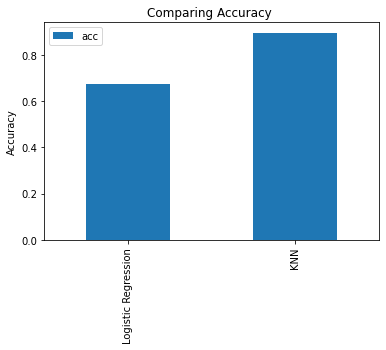

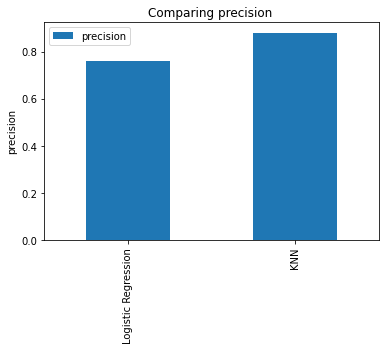

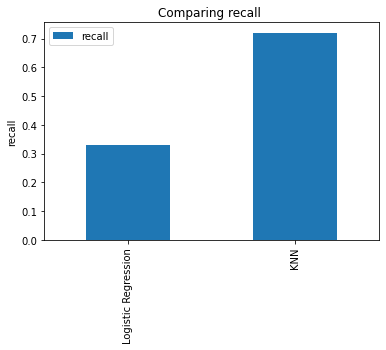

In [248]:
#plotting Accuracy
Acc_scores.plot(kind = 'bar', y='acc')
plt.title("Comparing Accuracy ")
plt.ylabel('Accuracy')
plt.show()

#plotting precision
p.plot(kind = 'bar', y='precision')
plt.title("Comparing precision ")
plt.ylabel('precision')
plt.show()

#plotting recall
r.plot(kind = 'bar', y='recall')
plt.title("Comparing recall ")
plt.ylabel('recall')
plt.show()

### Inference 

- Multiclass Logistic regression only gave an accuracy of 67% 
- Whereas Knn model has almost 90% accuracy
- there was no optimal number of feature subset that returned high accuarcy.
- Also there was no particular feature set that had very string correlation to contribute to the model performance.